# Using the NeuralNetwork Class with sklearn methods

mlrose-ky offers the flexibility to use the NeuralNetwork() class with the sklearn methods to find weights with the lowest loss (highest fitness scores) using randomized optimization algorithms.

Since NeuralNetwork() is a child class of sklearn's ClassifierMixin, it has access to it's methods and can use sklearn functions too.

In this example, we shall find weights using genetic algorithms (GA).
Note: If you used torch in A1, then it's best to peruse the pyperch library instead. Otherwise, you'd have to re-do your A1 neural network experiments in sklearn.

# Import libraries

In [1]:
from mlrose_ky.neural.neural_network import NeuralNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, LearningCurveDisplay, validation_curve, ValidationCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import ScalarFormatter
import warnings

warnings.filterwarnings('ignore')
rng = 1

# Loading the dataset and some pre-processing

We load the wine dataset, apply bins and perform scaling to reduce fit times.

**Please use the same pre-processing that you have done as in A1 so the algorithms work on the same target dataset as per A1.**

In [2]:
data = 'dataset/winequality-red.csv'
ds = pd.read_csv(data, sep=';')
ds['quality'] = pd.cut(ds['quality'], bins=[1, 5, 10], labels=['bad', 'good'])

# Encode good and bad labels
quality_labels = {'good': 1, 'bad': 0}
ds['quality'] = ds['quality'].replace(quality_labels)
ds['quality'].value_counts()

# split dataframe into target and features
X = ds.drop('quality', axis=1)
y = ds['quality']

# split data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

# scaling training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

# Instantiating the NeuralNetwork Object

We instantiate the NeuralNetwork() object and define the different pop sizes we want to perform validation on by keeping other parameters constant.

In [3]:
nn_ga = NeuralNetwork(hidden_nodes=[20, 10, 5], algorithm='genetic_alg', max_iters=1000, random_state=rng, curve=True)
pop_sizes = [5, 50, 200]

# Validation Curves
Here we use scikit-learn's validation_curve() method and ValidationCurveDisplayMethod(). Hear your computer go brrrr if you use n_jobs=-1!

In [4]:
ga_train_pop_size, ga_valid_pop_size = validation_curve(estimator=nn_ga, X=X_train, y=y_train, param_name="pop_size",
                                                        param_range=pop_sizes, cv=3, scoring="accuracy", n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   9 | elapsed:    4.4s remaining:   35.5s
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    4.5s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    4.5s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   31.1s remaining:   38.9s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   31.4s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   31.4s remaining:   15.7s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  2.0min remaining:   33.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.0min finished


Text(0.5, 1.0, 'GA: Varying population sizes')

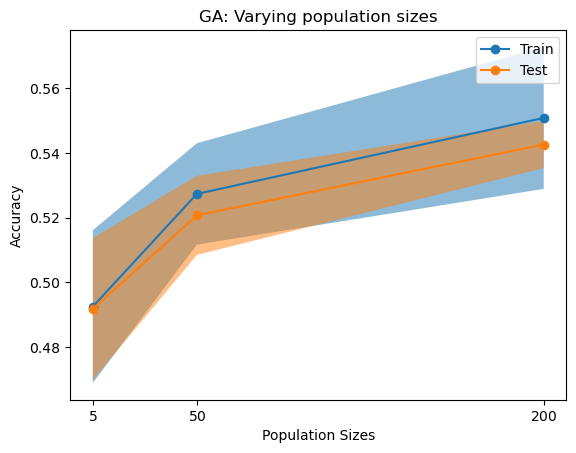

In [5]:
display = ValidationCurveDisplay(param_name='Population Sizes', param_range=np.array(pop_sizes), train_scores=ga_train_pop_size,
                                 test_scores=ga_valid_pop_size, score_name='Accuracy')

param = {"line_kw": {"marker": "o"}}
display.plot(**param)

plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(ticks=pop_sizes)
plt.title("GA: Varying population sizes")

# Learning curve
Once you have identified the best parameter combination using manual tuning, grid search or whatever library. You can make a new classifier to plot the learning curve.

Here we identify that a pop_size of 50 and mutation probability of 25% works well so we go ahead and define the new classifier below.
Once the new object is instantiated, we use learning_curve() and LearningCurveDisplay() methods to plot the learning curve.

In [6]:
nn_ga_final = NeuralNetwork(hidden_nodes=[20, 10, 5], algorithm='genetic_alg', max_iters=1000,
                            random_state=rng, curve=True, pop_size=50, mutation_prob=0.25)

train_size, train_score, valid_score = learning_curve(estimator=nn_ga_final, X=X_train, y=y_train, random_state=rng, cv=3, n_jobs=-1)

Text(0.5, 1.0, 'GA: Learning Curve')

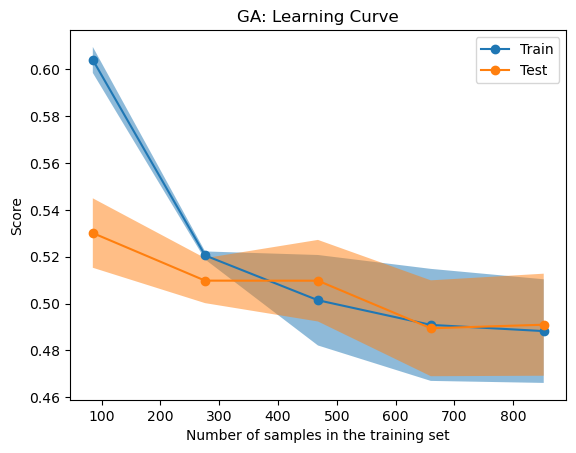

In [7]:
display = LearningCurveDisplay(train_sizes=train_size, train_scores=train_score, test_scores=valid_score, score_name="Score")

param = {"line_kw": {"marker": "o"}}
display.plot(**param)
plt.title("GA: Learning Curve")

# Loss curve
Once .fit() is called on your final classifier. We can use the .fitness_curve on the object to get our loss curve out.
The length is used as a training iteration and the second column gives us the loss values.

Text(0.5, 0, 'Training Iteration')

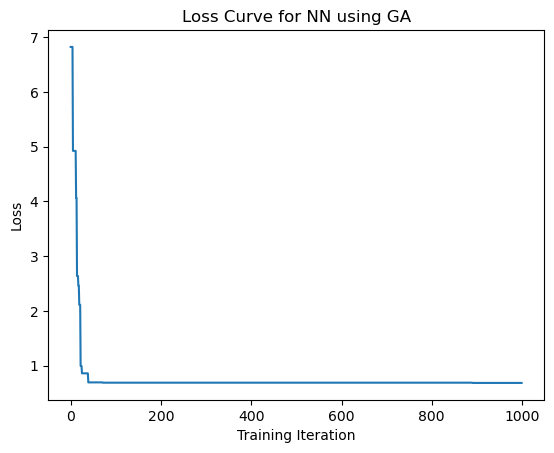

In [8]:
nn_ga_final.fit(X_train, y_train)
df = pd.DataFrame(nn_ga_final.fitness_curve)

# df.to_csv('loss_curve_ga.csv')  # You should save your dataframes to CSV or Pickle files as you run your experiments

plt.plot(np.arange(len(nn_ga_final.fitness_curve)), nn_ga_final.fitness_curve[:, 0])
plt.title("Loss Curve for NN using GA")
plt.ylabel('Loss')
plt.xlabel('Training Iteration')

# Computing performance on the test set.
Similar to sklearn, we can use the .predict() method to use our TRAINED GA classifier to make predictions on the test set.
These predictions are then checked against original target labels to give us the accuracy.

The .score() gives us the accuracy but you can use your own scoring metric based on what was chosen in A1.

In [9]:
nn_ga_final.predict(X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [10]:
nn_ga_final.score(X=X_test, y=y_test)

0.4875